In [1]:
import geopandas as gpd

path = "..\\Data\\tl_2021_us_county\\tl_2021_us_county.shp"
county_df = gpd.read_file(path).to_crs("EPSG:4326")

county_df = county_df.loc[county_df['NAME']== 'San Diego',]

county_df

from shapely import Polygon, Point

san_deigo_polygon = county_df.loc[539,'geometry']
san_deigo_polygon.contains(Point(0,0))


import rioxarray
dem = rioxarray.open_rasterio("..\\Data\\population_usa28_-120_2019-07-01.tif")
dem

<xarray.DataArray (band: 1, y: 27328, x: 36032)> Size: 8GB
[984682496 values with dtype=float64]
Coordinates:
  * band         (band) int32 4B 1
  * x            (x) float64 288kB -120.0 -120.0 -120.0 ... -110.0 -110.0 -110.0
  * y            (y) float64 219kB 38.92 38.92 38.92 38.92 ... 31.33 31.33 31.33
    spatial_ref  int32 4B 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     nan
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      Population Count

In [ ]:
import matplotlib.pyplot as plt

path = "..\\Data\\tl_2021_06_tract\\tl_2021_06_tract.shp"
tract_df = gpd.read_file(path).to_crs("EPSG:4326")
tract_df = tract_df.loc[tract_df['COUNTYFP']== '073',]

clipped_raster = dem.rio.clip([san_deigo_polygon])

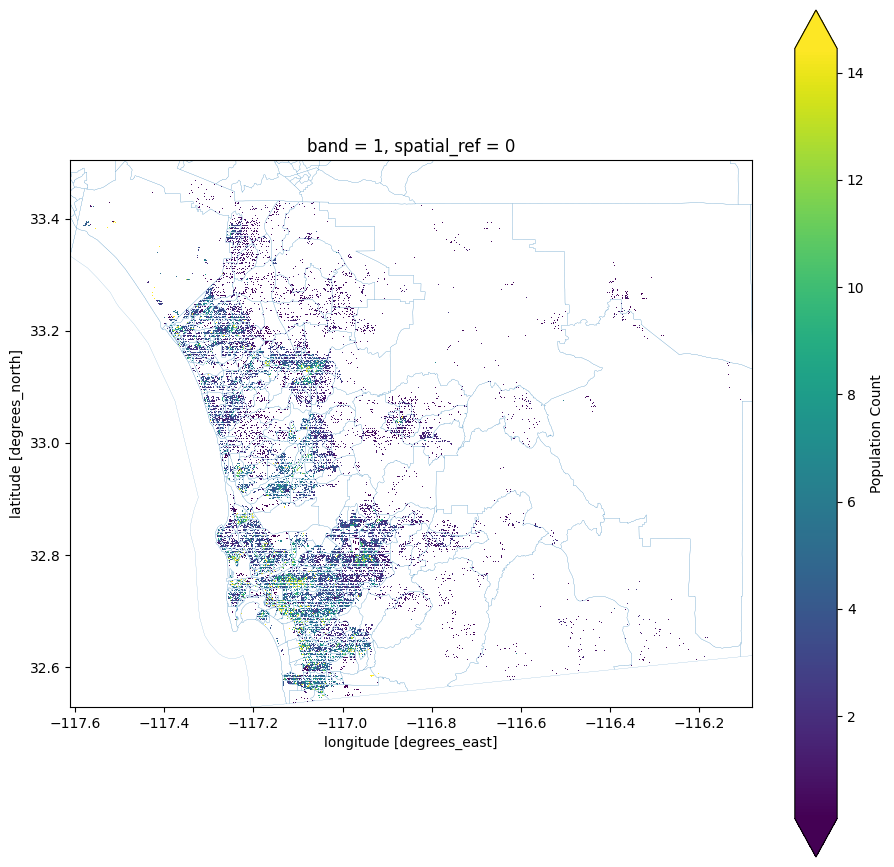

In [5]:
fig,ax = plt.subplots(1,1,sharex=True,sharey=True,figsize=(11,11))
tract_df.boundary.plot(ax=ax,linewidth=0.1)
clipped_raster.plot(ax=ax,robust=True)

In [6]:
afterdrop = clipped_raster
afterdrop = afterdrop.to_dataframe('afterdrop')
afterdrop = afterdrop.dropna()
afterdrop['afterdrop'].sum()

2782294.505288508

In [9]:
clipped_raster.sum()

<xarray.DataArray ()> Size: 8B
array(2782294.50528851)
Coordinates:
    spatial_ref  int32 4B 0

In [ ]:
for index,row in afterdrop.iterrows():
    print(row['Name'])
    #print(index)
    break

In [11]:
afterdrop['geometry'] = [Point(row['y'],row['x']) for index,row in afterdrop.iterrows()]

san_deigo_pop_density = gpd.GeoDataFrame(afterdrop,geometry=afterdrop['geometry'])

KeyError: 'y'